# Exploratory Data Analysis

In [1]:
# Import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Pranjali\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read the data.
df =pd.read_csv(r'C:\Users\Kunal\insurance.csv')

In [3]:
# Look at first five rows of data.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
# Check the null values.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EA1F612E8>,
      dtype=object)

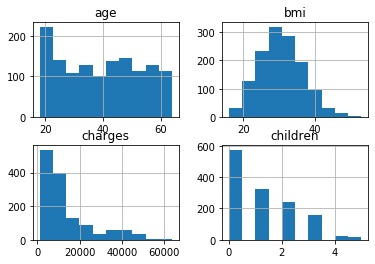

In [6]:
# Hisogram of some of the independent variables
df[['age','bmi','charges','children']].hist()

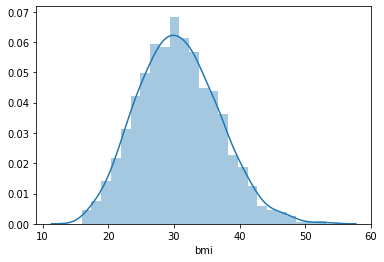

In [7]:
den1=sns.distplot(df['bmi'])

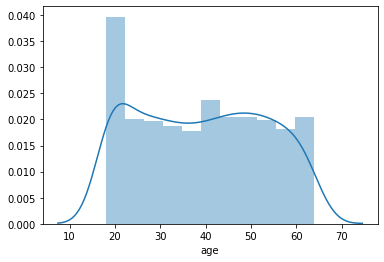

In [8]:
den2=sns.distplot(df['age'])

Text(0.5, 1.0, 'Distribution of Charges')

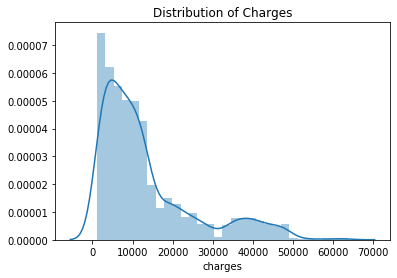

In [9]:
den3=sns.distplot(df['charges'])
plt.title("Distribution of Charges")

This distribution is right-skewed. To make it closer to normal we can apply natural log



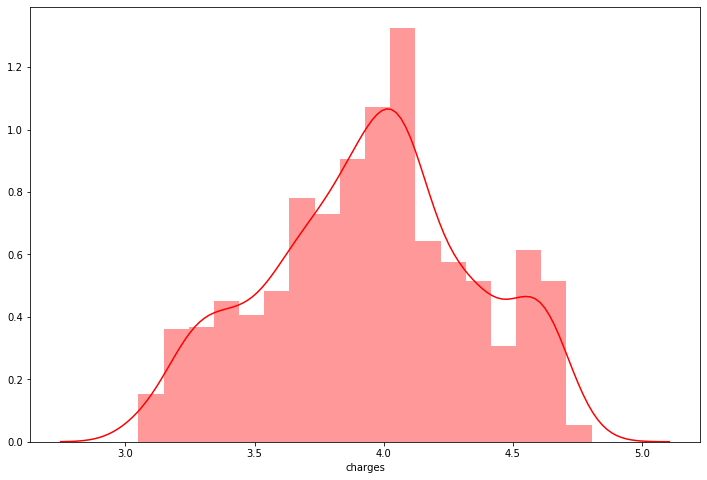

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
den3_ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

### From the above density plot we can say that the distribution of charges are positively skewed.

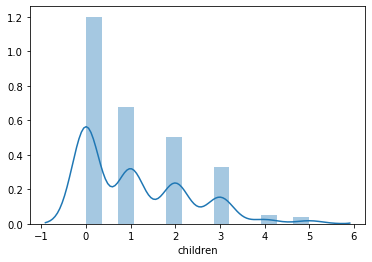

In [11]:
den4=sns.distplot(df['children'])

Text(0.5, 1.0, 'Boxplot for Charges of Smoker')

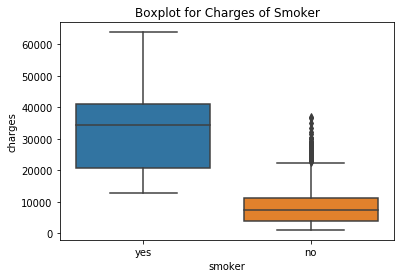

In [12]:
bxplt=sns.boxplot(x="smoker",y='charges',data=df)
plt.title("Boxplot for Charges of Smoker")

### From the above boxplot we can say that the mean value of charges for non smoker are less than mean value of charges of smoker

Text(0.5, 1.0, 'Boxplot of Regions')

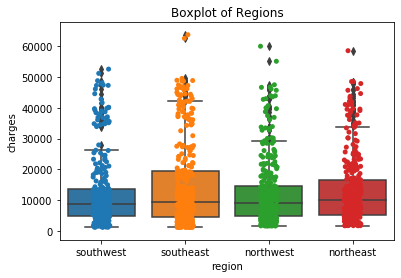

In [13]:
sns.boxplot(x="region",y="charges",data=df)
sns.stripplot(x="region",y="charges",data=df)
plt.title("Boxplot of Regions")

### We can see that southeast region has the highest mean charges while mean charges for the rest are not much of a difference from each other.

Text(0.5, 1.0, 'Boxplot for Charges of Smoker sexwise')

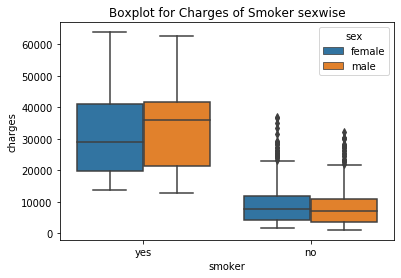

In [14]:
bxplt=sns.boxplot(x="smoker",y='charges',hue="sex",data=df)
plt.title("Boxplot for Charges of Smoker sexwise")

### Mean value of charges for female smokers are slightly less than that of men smokers.

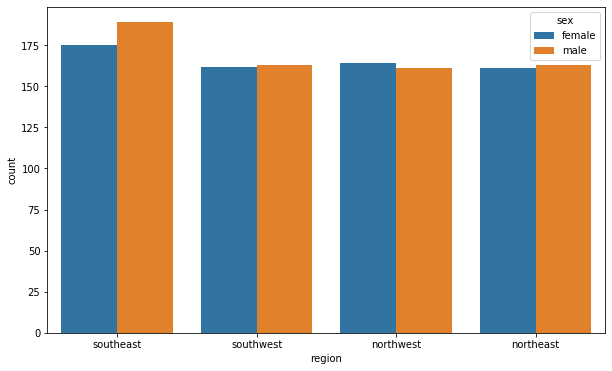

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='region',order=df['region'].value_counts(ascending=False).index,hue='sex')

### From the above plot we can say the most number of customers belongs to southeast region and this region also has the most number of male & female customer

Text(0.5, 1.0, 'Number of Males & Females')

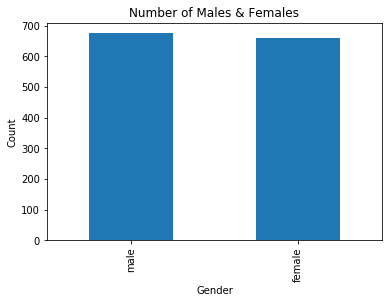

In [16]:
barplot=df['sex'].value_counts(ascending=False).plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Number of Males & Females")

Text(0.5, 1.0, 'Number of Smokers')

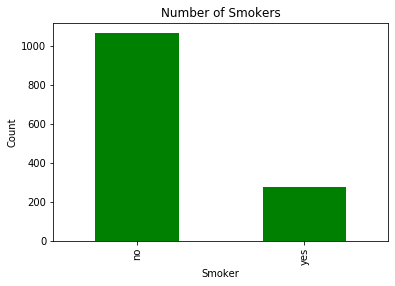

In [17]:
barplot2=df['smoker'].value_counts(ascending=False).plot(kind='bar', color="green")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.title("Number of Smokers")

Text(0.5, 1.0, 'Number of People with Children')

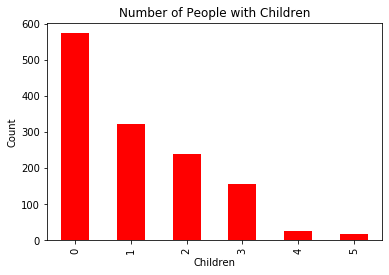

In [18]:
barplot4=df['children'].value_counts(ascending=False).plot(kind='bar', color="red")
plt.xlabel("Children")
plt.ylabel("Count")
plt.title("Number of People with Children")

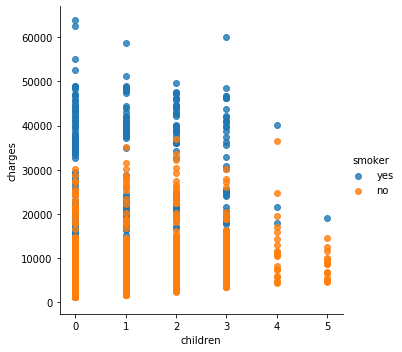

In [19]:
sns.lmplot(data=df, x="children",y="charges", fit_reg=False,hue='smoker')

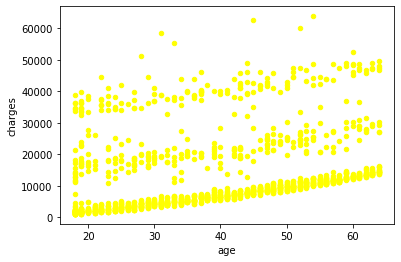

In [20]:
df.plot(kind='scatter',x='age',y='charges',color='yellow')

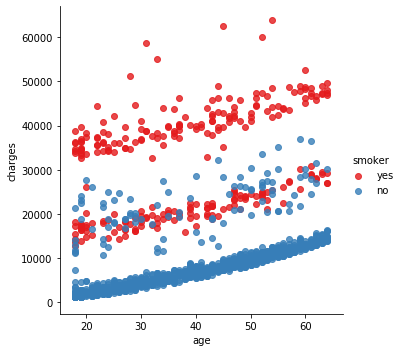

In [21]:
sns.lmplot(data=df, x="age",y="charges", fit_reg=False,hue="smoker",palette='Set1')

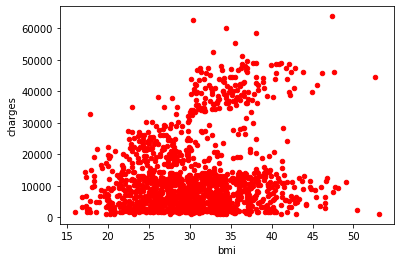

In [22]:
df.plot(kind='scatter',x='bmi',y='charges',color='red')

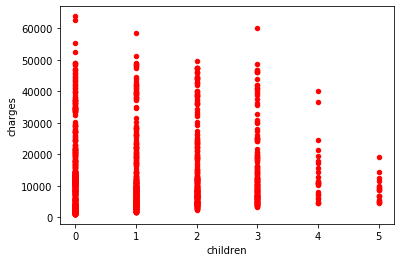

In [23]:
df.plot(kind='scatter',x='children',y='charges',color='red')

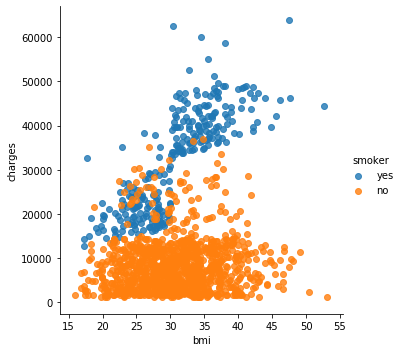

In [24]:
sns.lmplot(data=df, x="bmi",y="charges", fit_reg=False,hue="smoker")

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

 One way to view all relationship first and get an overview on our data is to use pairplot.

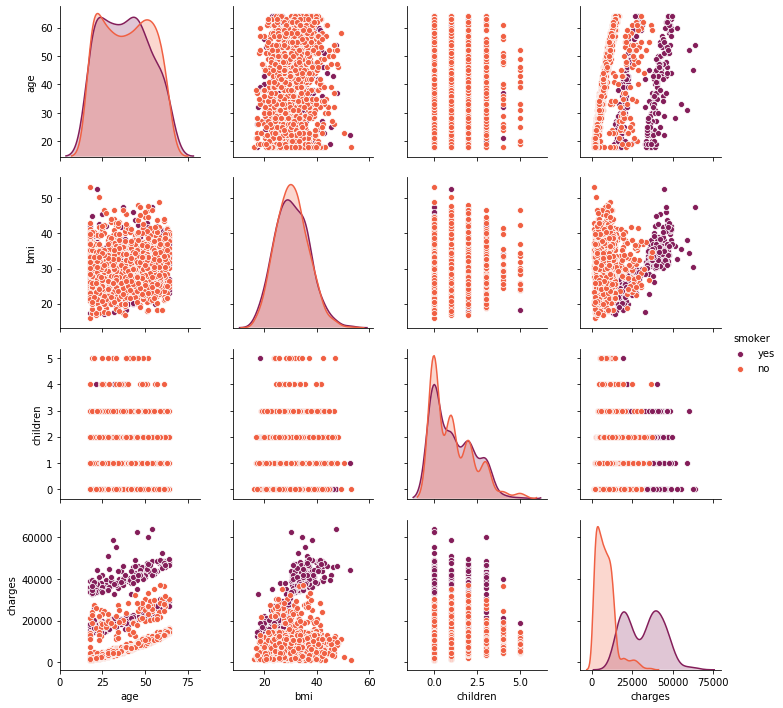

In [25]:
sns.pairplot(df, palette="rocket",hue="smoker")

In [26]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(df['sex'])
df['sex']=label.transform(df['sex'])
label.fit(df['smoker'])
df['smoker']=label.transform(df['smoker'])
label.fit(df['region'])
df['region']=label.transform(df['region'])

In [27]:
df.dtypes


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [28]:
labels=["too_weak","normal","heavy","too_heavy"]
ranges=[0,18.5,24.9,29.9,np.inf]
df["bmi"]=pd.cut(df["bmi"],bins=ranges,labels=labels)

In [29]:
df_new=df.copy()
df_new=pd.get_dummies(data=df,columns=["sex","smoker"],drop_first=True)

In [30]:
df_new=pd.get_dummies(data=df_new,columns=["region","bmi"])

In [31]:
df_new.head()

,age,children,charges,sex_1,smoker_1,region_0,region_1,region_2,region_3,bmi_too_weak,bmi_normal,bmi_heavy,bmi_too_heavy
0,19,0,16884.92400,0,1,0,0,0,1,0,0,1,0
1,18,1,1725.55230,1,0,0,0,1,0,0,0,0,1
2,28,3,4449.46200,1,0,0,0,1,0,0,0,0,1
3,33,0,21984.47061,1,0,0,1,0,0,0,1,0,0
4,32,0,3866.85520,1,0,0,1,0,0,0,0,1,0


In [32]:
from numpy import log, log1p
from sklearn.preprocessing import StandardScaler,MinMaxScaler


df_new.charges=log(df_new.charges)

sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df_new),columns=df_new.columns,index=df_new.index)

df_scaled.head()

,age,children,charges,sex_1,smoker_1,region_0,region_1,region_2,region_3,bmi_too_weak,bmi_normal,bmi_heavy,bmi_too_heavy
0,-1.438764,-0.908614,0.691394,-1.010519,1.970587,-0.565267,-0.566418,-0.611324,1.765481,-0.126275,-0.444805,1.587782,-1.072905
1,-1.509965,-0.078767,-1.790020,0.989591,-0.507463,-0.565267,-0.566418,1.635795,-0.566418,-0.126275,-0.444805,-0.629809,0.932049
2,-0.797954,1.580926,-0.759500,0.989591,-0.507463,-0.565267,-0.566418,1.635795,-0.566418,-0.126275,-0.444805,-0.629809,0.932049
3,-0.441948,-0.908614,0.978513,0.989591,-0.507463,-0.565267,1.765481,-0.611324,-0.566418,-0.126275,2.248177,-0.629809,-1.072905
4,-0.513149,-0.908614,-0.912181,0.989591,-0.507463,-0.565267,1.765481,-0.611324,-0.566418,-0.126275,-0.444805,1.587782,-1.072905


In [33]:
X=df_scaled.drop("charges",axis=1)
y=df_scaled["charges"] 


### Correlation Plot

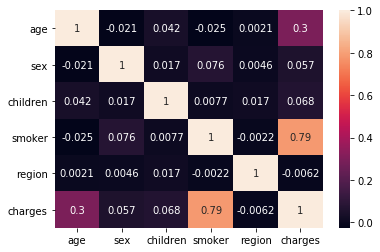

In [34]:
corr =df.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr,annot=True)

No correlation, except with the smoking



In [35]:
##Pearson’s bivariate correlations(correlation Matrix)

my_rho = np.corrcoef(X)

print(my_rho)

[[ 1.         -0.26688674 -0.43855885 ... -0.05654804  0.79752419
   0.39640286]
 [-0.26688674  1.          0.84502394 ...  0.7558413  -0.24347628
  -0.62209606]
 [-0.43855885  0.84502394  1.         ...  0.51607012 -0.39968536
  -0.64811227]
 ...
 [-0.05654804  0.7558413   0.51607012 ...  1.         -0.04562264
  -0.36193997]
 [ 0.79752419 -0.24347628 -0.39968536 ... -0.04562264  1.
   0.14638842]
 [ 0.39640286 -0.62209606 -0.64811227 ... -0.36193997  0.14638842
   1.        ]]


### Important Features

### The most effective factor is smoking followed by bmi & age

# Model Building

In [36]:
from scipy import stats
from scipy.stats import norm
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import boxcox
%matplotlib inline

C:\Users\Pranjali\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


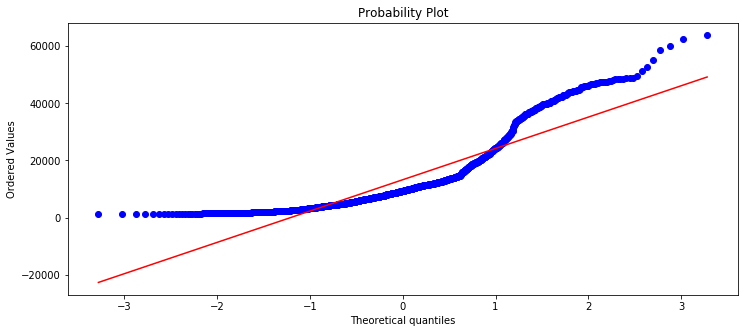

In [37]:
plt.figure(figsize=(12,5));

stats.probplot(df.charges, dist="norm",plot=pylab) ;


## VIF

In [38]:
# the independent variables set 

from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_df = pd.DataFrame() 
vif_df["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_df["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_df)

          feature       VIF
0             age  1.016444
1        children  1.004161
2           sex_1  1.009060
3        smoker_1  1.013013
4        region_0       inf
5        region_1       inf
6        region_2       inf
7        region_3       inf
8    bmi_too_weak       inf
9      bmi_normal       inf
10      bmi_heavy       inf
11  bmi_too_heavy       inf


C:\Users\Pranjali\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## Multiple Linear Regression

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lin_reg.coef_

array([ 0.52848429,  0.13152188, -0.02664332,  0.6873468 ,  0.03764728,
        0.00922889, -0.02649753, -0.01933951, -0.03606923, -0.04930385,
       -0.01072092,  0.05538869])

In [43]:
lin_reg.intercept_

0.0034394048733867345

In [44]:
score1=lin_reg.score(X_test,y_test)

In [45]:
y_test_pred=lin_reg.predict(X_test)

In [46]:
mse1=metrics.mean_squared_error(y_test,y_test_pred)

**Assumption homoscedasticity**

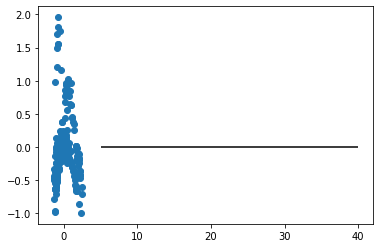

In [47]:
resid= y_test-y_test_pred
resid = pd.Series(resid)
plt.scatter(y_test_pred,resid)
plt.hlines(0,5,40)

In [50]:
#train(charges ~ age + children + bmi + sex + bmi*smoker + region, df_train, method="lm",trcontrol=train.control)

## OLS Regression

In [51]:
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              342.3
Date:                Sun, 14 Feb 2021   Prob (F-statistic):                   1.48e-323
Time:                        22:30:54   Log-Likelihood:                         -747.58
No. Observations:                1070   AIC:                                      1515.
Df Residuals:                    1060   BIC:                                      1565.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.5285      0.015     35.001      0.000       0.499       0.558
children          0.1315      0.015      8.785      0.000       0.102       0.161
sex_1            -0.0267      0.015     -1.784      0.075      -0.056       0.003
smoker_1          0.6874      0.015     45.611      0.000       0.658       0.717
region_0          0.0376      0.012      3.255      0.001       0.015       0.060
region_1          0.0092      0.011      0.803      0.422      -0.013       0.032
region_2         -0.0265      0.011     -2.348      0.019      -0.049      -0.004
region_3         -0.0193      0.011     -1.728      0.084      -0.041       0.003
bmi_too_weak     -0.0361      0.015     -2.470      0.014      -0.065      -0.007
bmi_normal       -0.0493      0.012     -4.209      0.000      -0.072      -0.026
bmi_heavy        -0.0107      0.010     -1.062      0.289      -0.031       0.009
bmi_too_heavy     0.0554      0.009      6.082      0.000       0.038       0.073
==============================================================================
Omnibus:                      371.581   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1331.758
Skew:                           1.669   Prob(JB):                    6.49e-290
Kurtosis:                       7.328   Cond. No.                     8.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
X=df_scaled.drop(["charges","region_1"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              332.9
Date:                Sun, 14 Feb 2021   Prob (F-statistic):                   1.04e-318
Time:                        22:30:54   Log-Likelihood:                         -748.92
No. Observations:                1070   AIC:                                      1518.
Df Residuals:                    1060   BIC:                                      1568.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.5221      0.015     34.503      0.000       0.492       0.552
children          0.1216      0.015      8.170      0.000       0.092       0.151
sex_1            -0.0394      0.015     -2.624      0.009      -0.069      -0.010
smoker_1          0.6818      0.015     45.329      0.000       0.652       0.711
region_0          0.0298      0.018      1.622      0.105      -0.006       0.066
region_2         -0.0304      0.019     -1.597      0.110      -0.068       0.007
region_3         -0.0275      0.018     -1.492      0.136      -0.064       0.009
bmi_too_weak     -0.0401      0.016     -2.496      0.013      -0.072      -0.009
bmi_normal       -0.0407      0.011     -3.553      0.000      -0.063      -0.018
bmi_heavy        -0.0135      0.010     -1.335      0.182      -0.033       0.006
bmi_too_heavy     0.0525      0.009      5.801      0.000       0.035       0.070
==============================================================================
Omnibus:                      351.567   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.694
Skew:                           1.613   Prob(JB):                    4.47e-249
Kurtosis:                       6.905   Cond. No.                     4.79e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
X=df_scaled.drop(["charges","region_1","bmi_heavy"],axis=1)
Y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              332.9
Date:                Sun, 14 Feb 2021   Prob (F-statistic):                   1.04e-318
Time:                        22:30:55   Log-Likelihood:                         -748.92
No. Observations:                1070   AIC:                                      1518.
Df Residuals:                    1060   BIC:                                      1568.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.5221      0.015     34.503      0.000       0.492       0.552
children          0.1216      0.015      8.170      0.000       0.092       0.151
sex_1            -0.0394      0.015     -2.624      0.009      -0.069      -0.010
smoker_1          0.6818      0.015     45.329      0.000       0.652       0.711
region_0          0.0298      0.018      1.622      0.105      -0.006       0.066
region_2         -0.0304      0.019     -1.597      0.110      -0.068       0.007
region_3         -0.0275      0.018     -1.492      0.136      -0.064       0.009
bmi_too_weak     -0.0364      0.017     -2.174      0.030      -0.069      -0.004
bmi_normal       -0.0297      0.017     -1.748      0.081      -0.063       0.004
bmi_too_heavy     0.0674      0.018      3.836      0.000       0.033       0.102
==============================================================================
Omnibus:                      351.567   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.694
Skew:                           1.613   Prob(JB):                    4.47e-249
Kurtosis:                       6.905   Cond. No.                         2.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X=df_scaled.drop(["charges","region_1","bmi_heavy","bmi_too_weak"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              368.0
Date:                Sun, 14 Feb 2021   Prob (F-statistic):                   5.55e-319
Time:                        22:30:55   Log-Likelihood:                         -751.31
No. Observations:                1070   AIC:                                      1521.
Df Residuals:                    1061   BIC:                                      1565.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.5246      0.015     34.710      0.000       0.495       0.554
children          0.1207      0.015      8.094      0.000       0.091       0.150
sex_1            -0.0392      0.015     -2.608      0.009      -0.069      -0.010
smoker_1          0.6810      0.015     45.209      0.000       0.651       0.711
region_0          0.0280      0.018      1.524      0.128      -0.008       0.064
region_2         -0.0294      0.019     -1.543      0.123      -0.067       0.008
region_3         -0.0281      0.018     -1.518      0.129      -0.064       0.008
bmi_normal       -0.0246      0.017     -1.461      0.144      -0.058       0.008
bmi_too_heavy     0.0733      0.017      4.218      0.000       0.039       0.107
==============================================================================
Omnibus:                      353.222   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1152.026
Skew:                           1.620   Prob(JB):                    6.93e-251
Kurtosis:                       6.917   Cond. No.                         2.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X=df_scaled.drop(["charges","region_1","bmi_heavy","bmi_too_weak","bmi_normal"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              413.3
Date:                Sun, 14 Feb 2021   Prob (F-statistic):                   7.66e-320
Time:                        22:30:56   Log-Likelihood:                         -752.38
No. Observations:                1070   AIC:                                      1521.
Df Residuals:                    1062   BIC:                                      1561.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.5257      0.015     34.804      0.000       0.496       0.555
children          0.1204      0.015      8.072      0.000       0.091       0.150
sex_1            -0.0393      0.015     -2.609      0.009      -0.069      -0.010
smoker_1          0.6803      0.015     45.161      0.000       0.651       0.710
region_0          0.0273      0.018      1.481      0.139      -0.009       0.063
region_2         -0.0293      0.019     -1.535      0.125      -0.067       0.008
region_3         -0.0274      0.018     -1.485      0.138      -0.064       0.009
bmi_too_heavy     0.0854      0.015      5.569      0.000       0.055       0.115
==============================================================================
Omnibus:                      348.586   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1118.357
Skew:                           1.604   Prob(JB):                    1.42e-243
Kurtosis:                       6.846   Cond. No.                         2.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X=df_scaled.drop(["charges","region_1","bmi_heavy","bmi_too_weak","bmi_normal","region_0"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              471.5
Date:                Sun, 14 Feb 2021   Prob (F-statistic):                   1.01e-320
Time:                        22:30:57   Log-Likelihood:                         -753.48
No. Observations:                1070   AIC:                                      1521.
Df Residuals:                    1063   BIC:                                      1556.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.5254      0.015     34.767      0.000       0.496       0.555
children          0.1199      0.015      8.036      0.000       0.091       0.149
sex_1            -0.0394      0.015     -2.620      0.009      -0.069      -0.010
smoker_1          0.6809      0.015     45.189      0.000       0.651       0.710
region_2         -0.0437      0.016     -2.658      0.008      -0.076      -0.011
region_3         -0.0413      0.016     -2.591      0.010      -0.073      -0.010
bmi_too_heavy     0.0847      0.015      5.527      0.000       0.055       0.115
==============================================================================
Omnibus:                      347.432   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1109.656
Skew:                           1.601   Prob(JB):                    1.10e-241
Kurtosis:                       6.827   Cond. No.                         1.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model.params

age              0.525361
children         0.119874
sex_1           -0.039446
smoker_1         0.680878
region_2        -0.043669
region_3        -0.041313
bmi_too_heavy    0.084726
dtype: float64

In [58]:
model=LinearRegression()
lin_mo=model.fit(X_train,y_train)
y_pred=lin_mo.predict(X_test)

In [59]:
lin_mo.score(X_train,y_train)

0.7564270243463643

In [60]:
lin_mo.score(X_test,y_test)

0.801416137553608

In [61]:
from sklearn.metrics import mean_squared_error,r2_score
r2_score(y_test,y_pred)

0.801416137553608

In [62]:
! pip install yellowbrick
from yellowbrick.regressor import residuals_plot


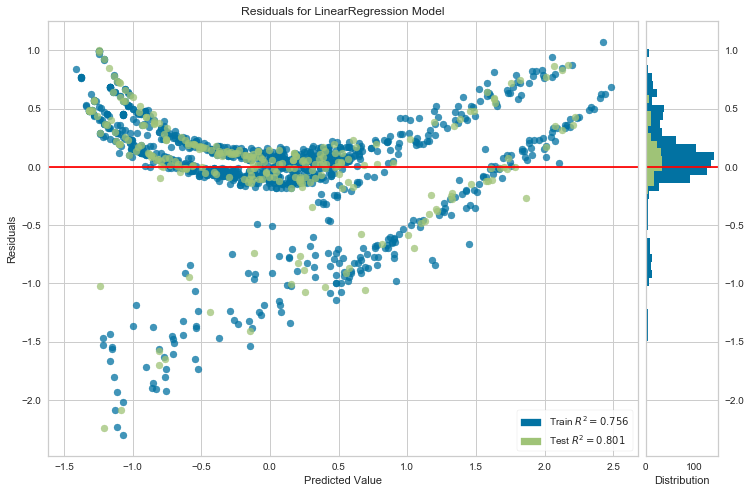

In [63]:
plt.figure(figsize=(12,8));
residuals_plot(model, X_train, y_train, X_test, y_test,line_color="red");

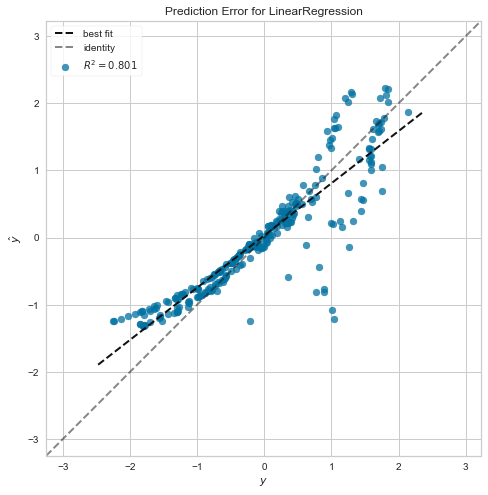

In [64]:
from yellowbrick.regressor import prediction_error
plt.figure(figsize=(12,8));
prediction_error(model, X_train, y_train, X_test, y_test);

In [65]:
model.coef_

array([ 0.52525861,  0.11979141, -0.03956982,  0.68085666, -0.0435505 ,
       -0.04135497,  0.08484658])

In [66]:
model.intercept_

0.009087327252385374

## Light Gradient Boosting Machine Regression

In [67]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [68]:
import lightgbm
from lightgbm import LGBMRegressor

In [69]:
lgbmreg=LGBMRegressor()

In [70]:
lgbmreg.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [71]:
score2=lgbmreg.score(X_test,y_test)

In [72]:
y_test_pred=lgbmreg.predict(X_test)

In [73]:
mse2=metrics.mean_squared_error(y_test,y_test_pred)

In [74]:
mse2

0.16215810889693905

## Extreme Gradient Boosting Regression

In [75]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [76]:
from xgboost import XGBRegressor

In [77]:
xgbreg=XGBRegressor()

In [78]:
xgbreg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [79]:
score3=xgbreg.score(X_test,y_test)

In [80]:
y_test_pred=xgbreg.predict(X_test)

In [81]:
mse3=metrics.mean_squared_error(y_test,y_test_pred)

## Histogram Gradient Boosting Regression

In [82]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [83]:
histgbreg=HistGradientBoostingRegressor()

In [84]:
histgbreg.fit(X_train,y_train)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=256,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0)

In [85]:
score4=histgbreg.score(X_test,y_test)

In [86]:
y_test_pred=histgbreg.predict(X_test)

In [87]:
mse4=metrics.mean_squared_error(y_test,y_test_pred)

## Polynomial Regression

In [88]:
from sklearn.preprocessing import PolynomialFeatures
x=df.drop(['charges','sex','region'],axis=1)
y=df['charges']

In [89]:
pol=PolynomialFeatures(degree=2)
X_pol=pol.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=0)

ValueError: could not convert string to float: 'heavy'

In [90]:
pol_reg= LinearRegression()
pol_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
score5=pol_reg.score(X_test,y_test)

In [92]:
y_test_pred=pol_reg.predict(X_test)

In [93]:
mse5=metrics.mean_squared_error(y_test,y_test_pred)

In [94]:
compare_models = pd.DataFrame(
    {"Model":['Linear Regression','LGBM Regression','xgb Regression','histgb Regression','Polynomial Regresssion'],
     'Score':[score1,score2,score3,score4,score5],
     "MSE":[mse1,mse2,mse3,mse4,mse5]
     })

In [95]:
compare_models

,Model,Score,MSE
0,Linear Regression,0.786606,0.212098
1,LGBM Regression,0.847624,0.162158
2,xgb Regression,0.781249,0.232795
3,histgb Regression,0.847257,0.162549
4,Polynomial Regresssion,0.801416,0.211333


# Conclusion
### We can now see the score of each model and compare them.
### LGBM Regression and Polynomial Regression will be right choice for our model.